In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.svm import SVC

In [2]:
df=pd.read_csv('D:/soni_ed/spyder/files/assignment/mushroom.csv')
df

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [3]:
df.info()
df=df.iloc[:,1:]
df.info()
df.isnull().sum()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

,stalk_height,cap_diameter
count,2000.000000,2000.000000
mean,8.449118,12.314345
std,3.697217,7.048845
min,2.000000,1.000000
25%,5.291009,5.723521
50%,8.318596,12.124902
75%,11.781272,18.698605
max,15.095066,25.000054


The 'cap_shape' column contains the object data type.
The 'cap_surface' column contains the object data type.
The 'cap_color' column contains the object data type.
The 'bruises' column contains the object data type.
The 'odor' column contains the object data type.
The 'gill_attachment' column contains the object data type.
The 'gill_spacing' column contains the object data type.
The 'gill_size' column contains the object data type.
The 'gill_color' column contains the object data type.
The 'stalk_shape' column contains the object data type.
The 'stalk_root' column contains the object data type.
The 'stalk_surface_above_ring' column contains the object data type.
The 'stalk_surface_below_ring' column contains the object data type.
The 'stalk_color_above_ring' column contains the object data type.
The 'stalk_color_below_ring' column contains the object data type.
The 'veil_type' column contains the object data type.
The 'veil_color' column contains the object data type.
The 'ring_number'

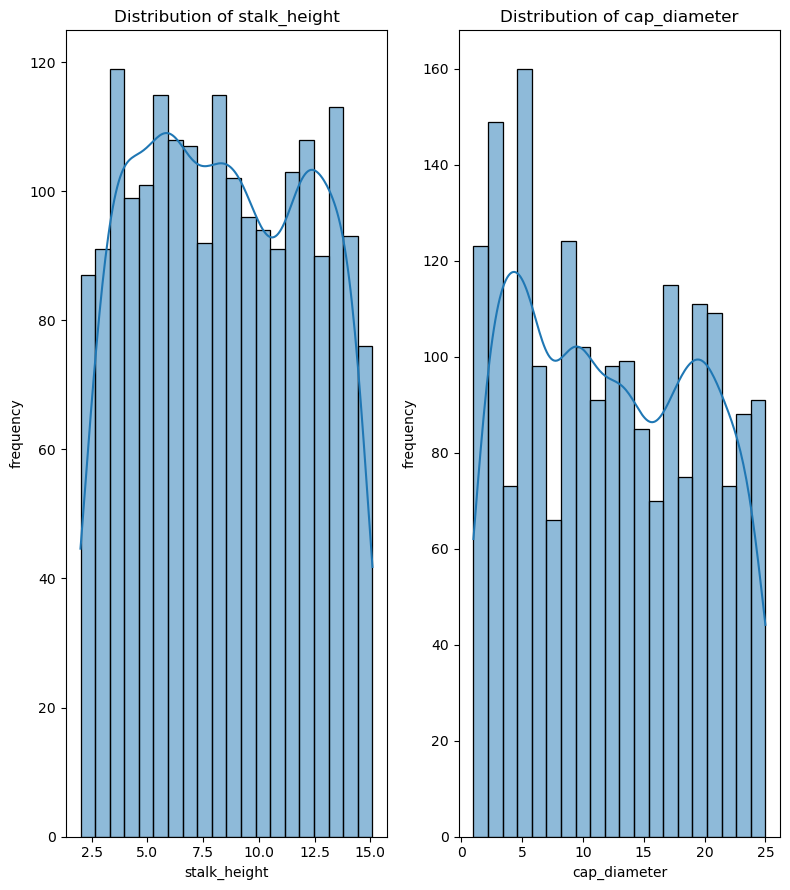

In [4]:
#HISTOGRAM
def hist(data):
    n_num = data.select_dtypes(exclude='object').columns
    l_num=len(n_num)
    sub_index=1
    n_rows = (l_num + 1)//2
    plt.figure(figsize=(8,9))
    for col in data:
        dtype = data[col].dtypes
        if(dtype == "object"):
            print(f"The '{col}' column contains the object data type.")
        else:
            plt.subplot(n_rows,2,sub_index)
            sns.histplot(data[col],kde=True,bins=20)
            plt.title(f"Distribution of {col}")
            plt.xlabel(col)
            plt.ylabel("frequency")
            sub_index += 1
    plt.tight_layout()
    plt.show()  
hist(df)

The stalk_height contains the non object data type
The cap_diameter contains the non object data type


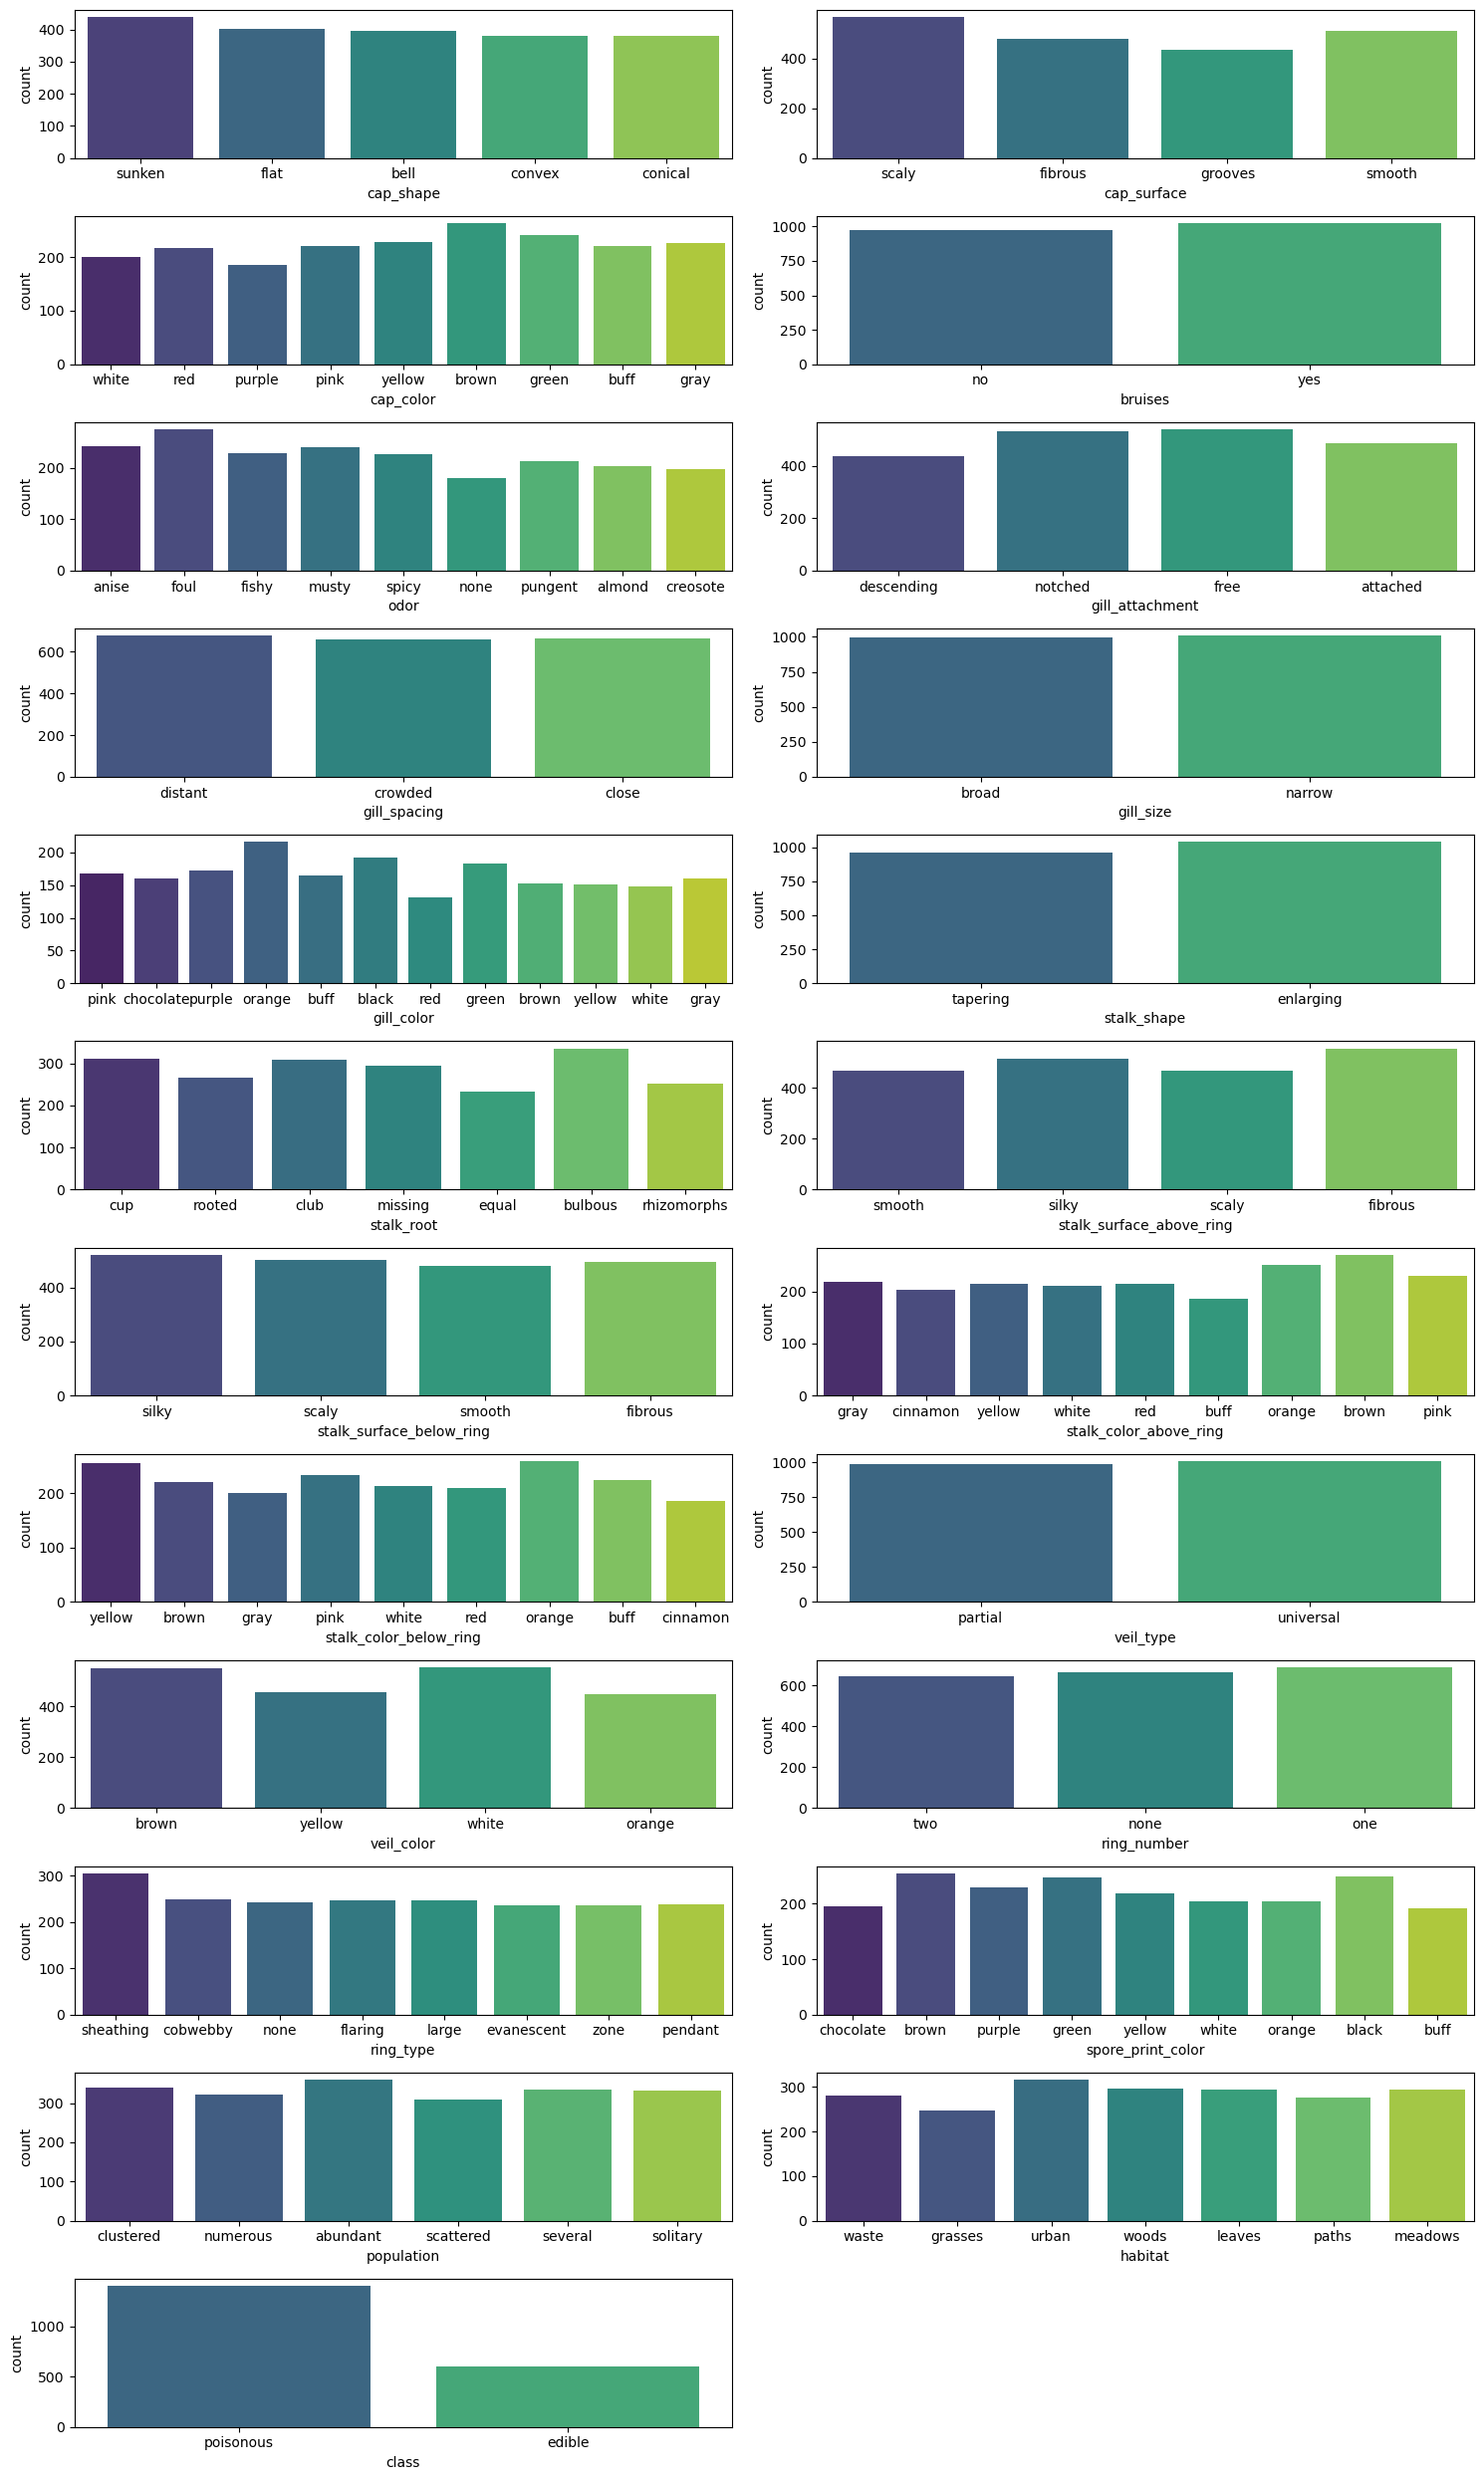

In [5]:
#BAR
def bar(data):
    n_obj=data.select_dtypes(include='object').columns
    l_obj=len(n_obj)
    sub_index=1
    n_rows=(l_obj+1)//2
    plt.figure(figsize=(15,25))
    for col in data:
        dtype=data[col].dtypes
        if(dtype == 'object'):
            plt.subplot(n_rows,2,sub_index)
            sns. countplot(x=data[col],data=data,hue=data[col],palette='viridis',legend=False)
            sub_index+=1
        else:
            print(f'The {col} contains the non object data type')
    plt.tight_layout()
    plt.show()   
bar(df)

The cap_shape contains the object data type
The cap_surface contains the object data type
The cap_color contains the object data type
The bruises contains the object data type
The odor contains the object data type
The gill_attachment contains the object data type
The gill_spacing contains the object data type
The gill_size contains the object data type
The gill_color contains the object data type
The stalk_shape contains the object data type
The stalk_root contains the object data type
The stalk_surface_above_ring contains the object data type
The stalk_surface_below_ring contains the object data type
The stalk_color_above_ring contains the object data type
The stalk_color_below_ring contains the object data type
The veil_type contains the object data type
The veil_color contains the object data type
The ring_number contains the object data type
The ring_type contains the object data type
The spore_print_color contains the object data type
The population contains the object data type


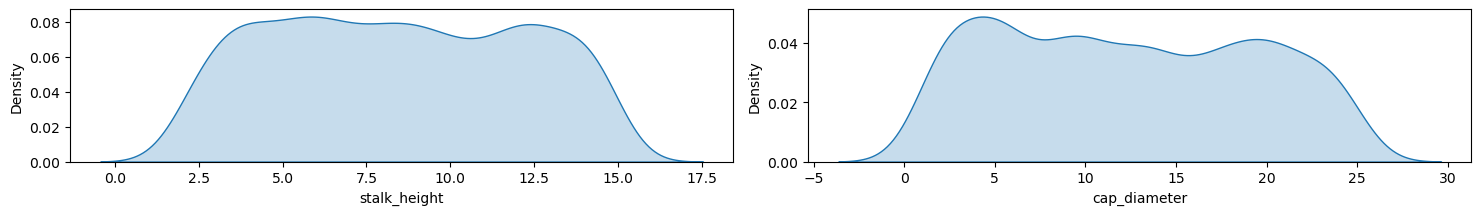

In [6]:
#Density plot
def density(data):
    n_obj=data.select_dtypes(include='object').columns
    l_obj=len(n_obj)
    sub_index=1
    n_rows=(l_obj+1)//2
    plt.figure(figsize=(15,25))
    for col in data:
        dtype=data[col].dtypes
        if(dtype == 'object'):
            print(f'The {col} contains the object data type')
        else:
            plt.subplot(n_rows,2,sub_index)
            sns.kdeplot(data[col], fill=True)
            sub_index+=1
    plt.tight_layout()
    plt.show()   
density(df)

In [7]:
# standardization or label encoding
std_s=StandardScaler()
LE=LabelEncoder()
def converter(data):
    add_data=[]
    column_names = data.columns
    for col in data:
        dtype = data[col].dtypes
        if dtype == 'object':
            converted_col = LE.fit_transform(data[col])           
        else:
            converted_col = std_s.fit_transform(data[[col]]).flatten()
        add_data.append(converted_col)
    final_data = pd.DataFrame({col: add_data[i] for i, col in enumerate(column_names)})
    return final_data
final_data = converter(df)
print(final_data)
final_data.info()

      cap_shape  cap_surface  cap_color  bruises  odor  gill_attachment  \
0             4            2          7        0     1                1   
1             4            0          6        0     1                3   
2             3            1          5        1     4                1   
3             0            2          4        1     3                3   
4             3            3          8        1     5                2   
...         ...          ...        ...      ...   ...              ...   
1995          4            2          0        1     4                0   
1996          4            2          5        1     5                0   
1997          2            1          3        1     3                3   
1998          0            3          7        0     7                2   
1999          2            2          8        1     7                1   

      gill_spacing  gill_size  gill_color  stalk_shape  ...  veil_type  \
0                2       

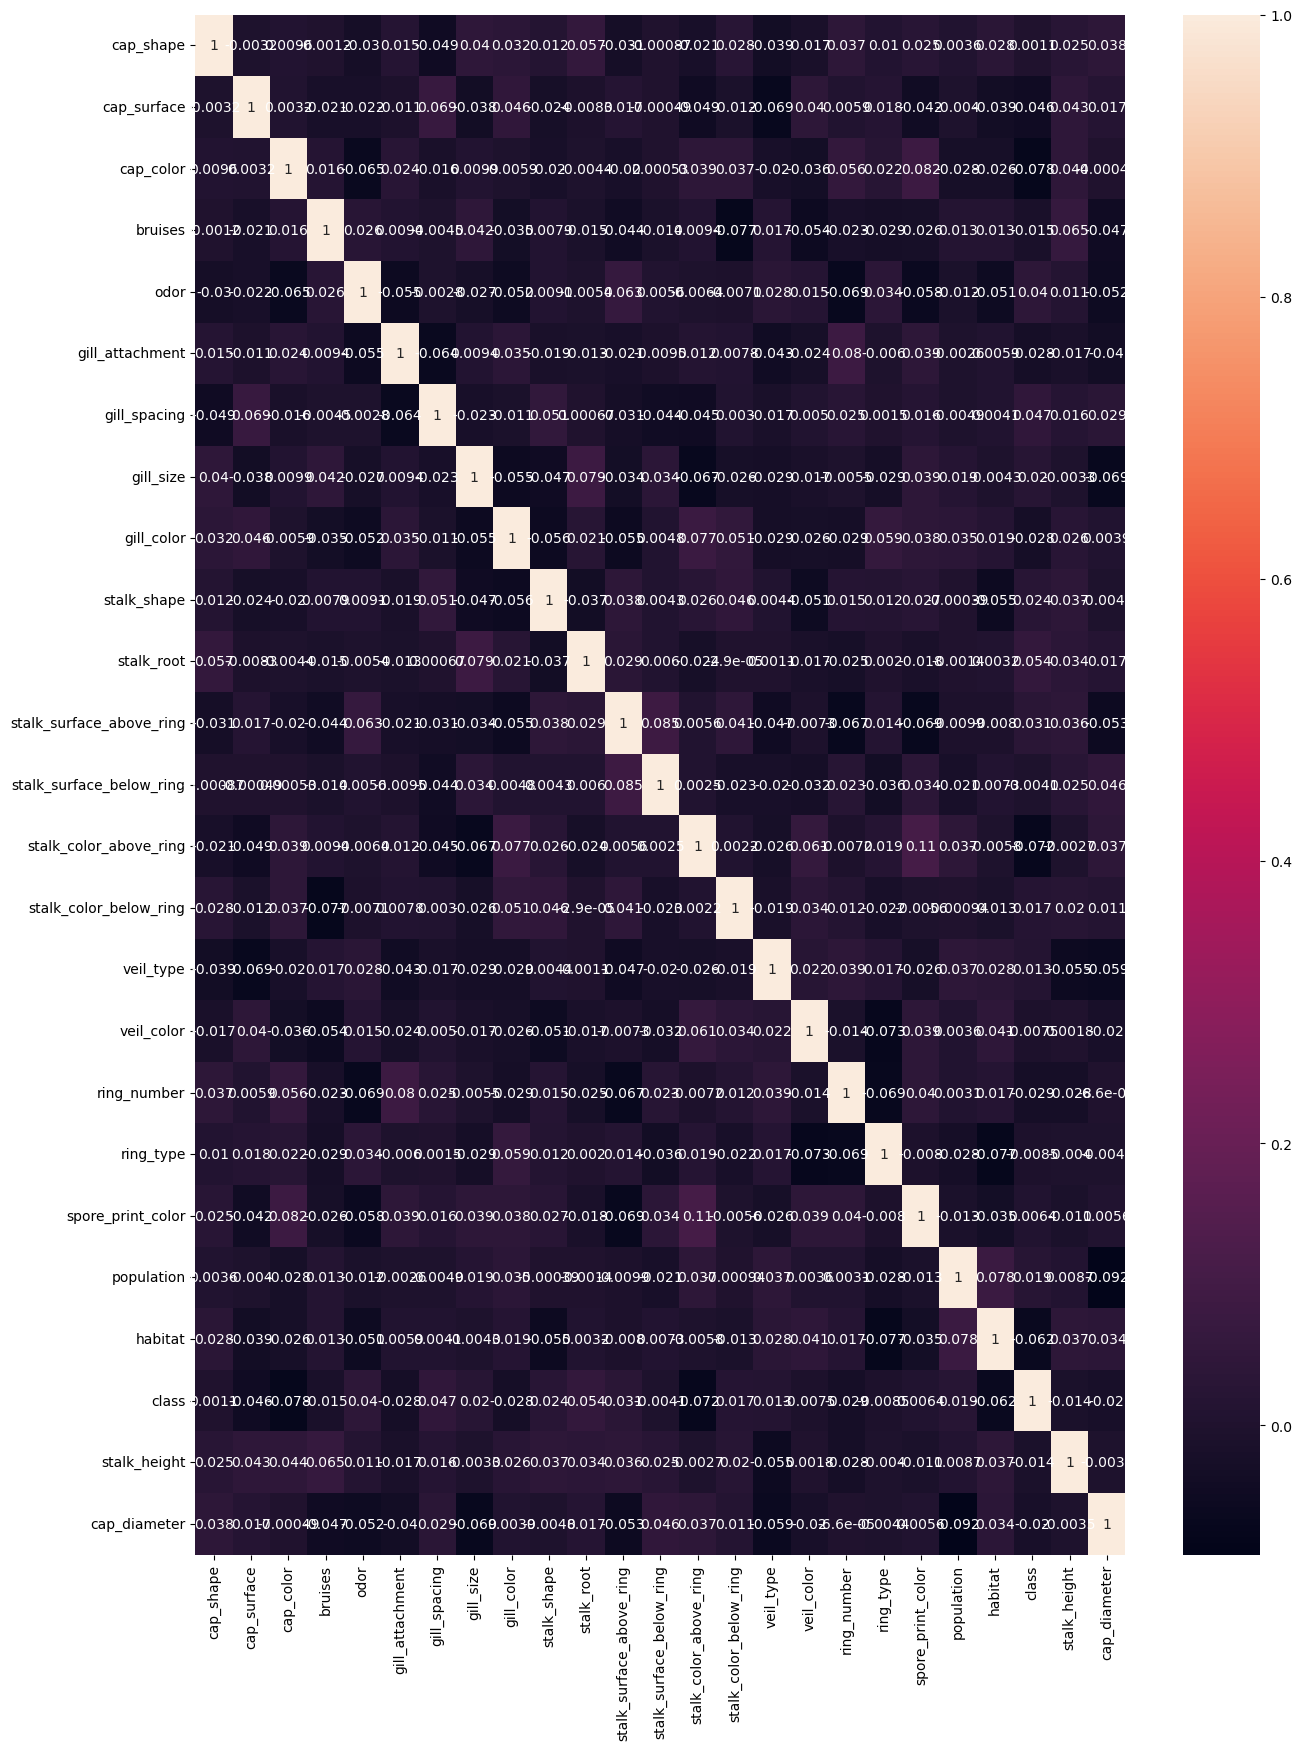

                          cap_shape  cap_surface  cap_color   bruises  \
cap_shape                  1.000000    -0.003244   0.009615 -0.001190   
cap_surface               -0.003244     1.000000   0.003153 -0.021352   
cap_color                  0.009615     0.003153   1.000000  0.016445   
bruises                   -0.001190    -0.021352   0.016445  1.000000   
odor                      -0.030119    -0.021926  -0.065410  0.026274   
gill_attachment            0.015477    -0.010513   0.023835  0.009402   
gill_spacing              -0.048783     0.068918  -0.015628 -0.004458   
gill_size                  0.040497    -0.038490   0.009888  0.041851   
gill_color                 0.032123     0.045561  -0.005898 -0.035135   
stalk_shape                0.011573    -0.024032  -0.020397  0.007928   
stalk_root                 0.057405    -0.008284  -0.004423 -0.014604   
stalk_surface_above_ring  -0.030537     0.016799  -0.019983 -0.043735   
stalk_surface_below_ring  -0.000870    -0.000493   

In [8]:
#correlation
plt.figure(figsize=(15,20))
correlation=final_data.corr()
sns.heatmap(correlation, annot=True)
plt.show()
print(correlation)

The 'cap_shape' column contains the object data type.
The 'cap_surface' column contains the object data type.
The 'cap_color' column contains the object data type.
The 'bruises' column contains the object data type.
The 'odor' column contains the object data type.
The 'gill_attachment' column contains the object data type.
The 'gill_spacing' column contains the object data type.
The 'gill_size' column contains the object data type.
The 'gill_color' column contains the object data type.
The 'stalk_shape' column contains the object data type.
The 'stalk_root' column contains the object data type.
The 'stalk_surface_above_ring' column contains the object data type.
The 'stalk_surface_below_ring' column contains the object data type.
The 'stalk_color_above_ring' column contains the object data type.
The 'stalk_color_below_ring' column contains the object data type.
The 'veil_type' column contains the object data type.
The 'veil_color' column contains the object data type.
The 'ring_number'

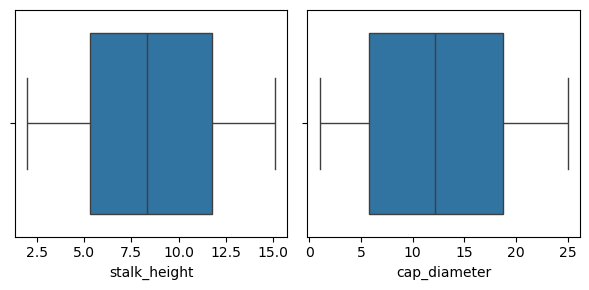

In [9]:
#BOXPLOT WITH OUTLIERS
#The columns which are in object data type those columns won't contain any outlier most probaly, contains the oulier but in rare 
def box(data):
    n_num=data.select_dtypes(exclude='object').columns
    l_num=len(n_num)
    n_rows=(l_num+1)//2
    sub_index=1
    plt.figure(figsize=(6,3))
    for col in data:
        dtype=data[col].dtypes
        if(dtype == 'object'):
            print(f"The '{col}' column contains the object data type.")
        else:
            plt.subplot(n_rows,2,sub_index)
            sns.boxplot(data=data[col],orient='h')
            sub_index+=1
    plt.tight_layout()
    plt.show()
box(df)

In [10]:
length=len(df.columns)
Target_var=final_data['class']

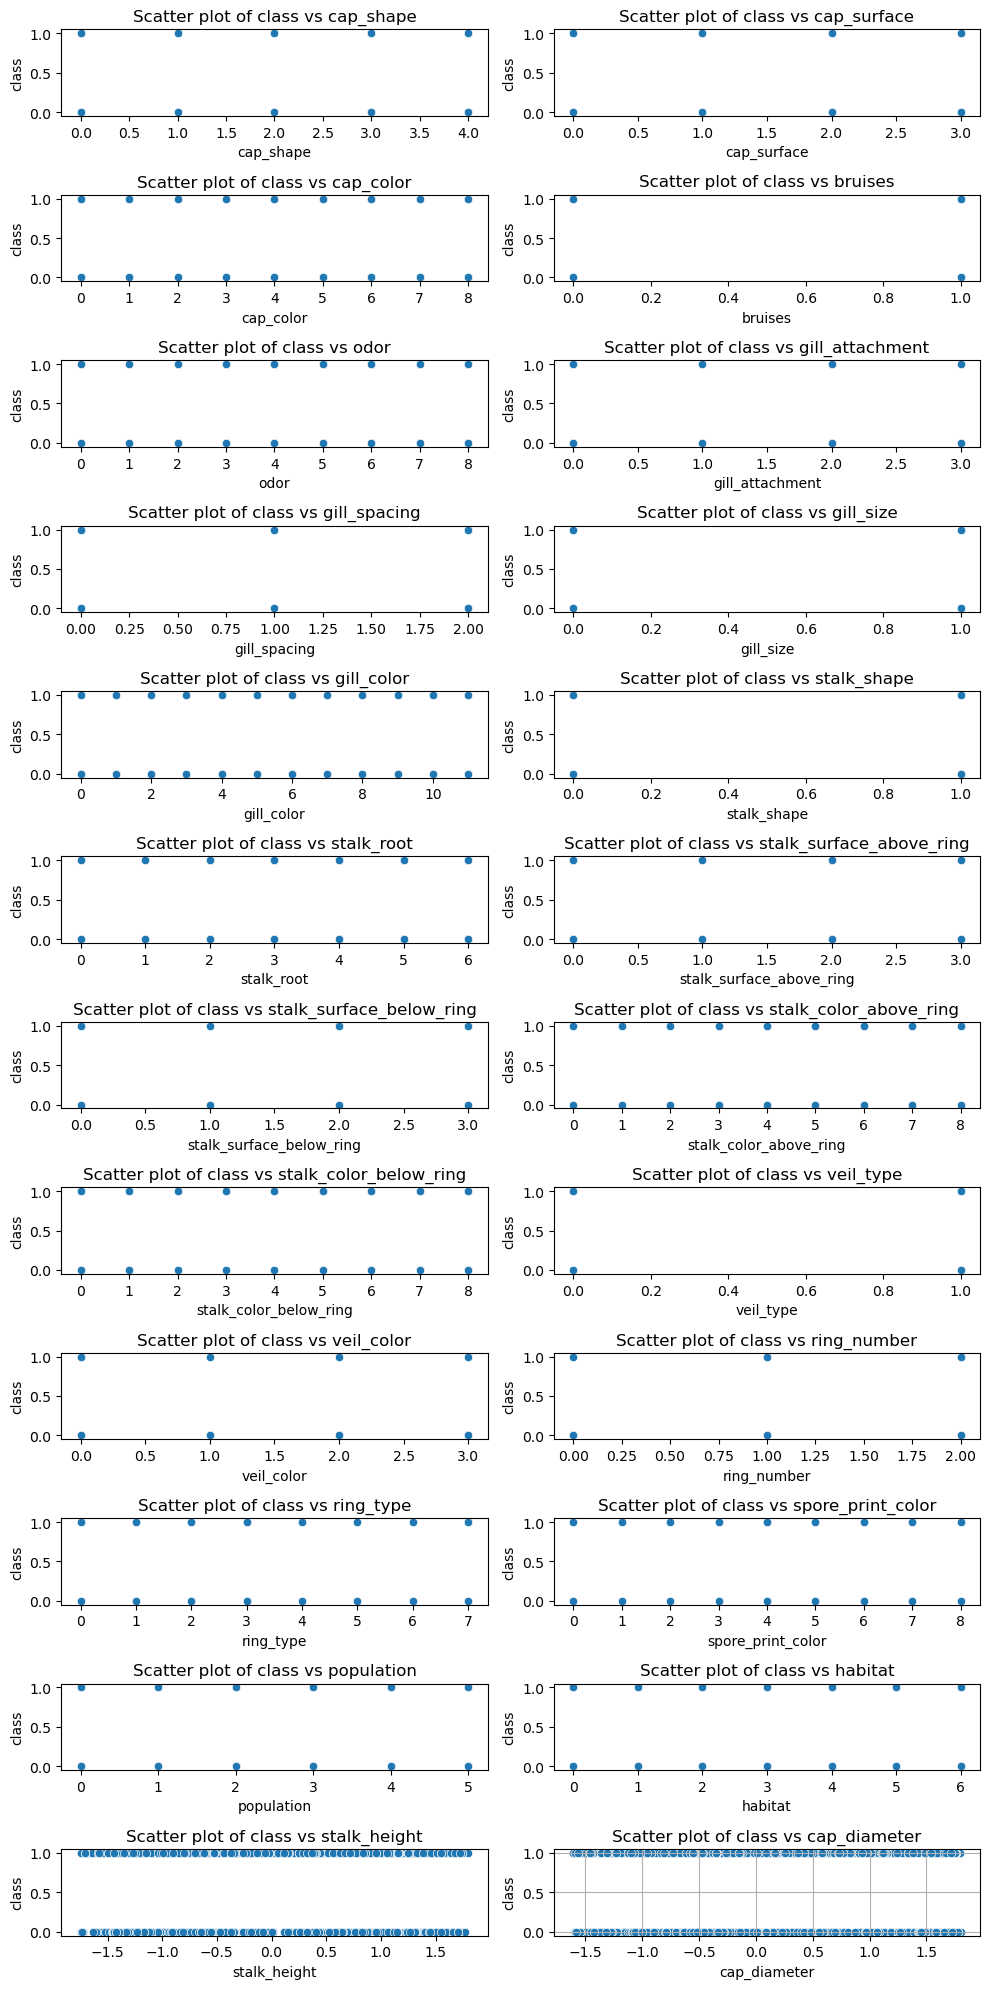

In [11]:
#Data Visualization
#Scatter plot
def relationship(data):
    for col in data.select_dtypes(exclude=('int32','float64')).columns:
        data[f'{col}_num']=data[col].astype('category').cat.codes
    n_num=data.select_dtypes(exclude='object').drop(Target_var.name,axis=1).columns
    l_num=len(n_num)
    n_rows=(l_num+1)//2
    sub_index=1 
    plt.figure(figsize=(10,20))  
    for col in n_num:
        plt.subplot(n_rows,2,sub_index)
        sns.scatterplot(x=data[col],y=Target_var)
        plt.xlabel(col)
        plt.ylabel(f'{Target_var.name}')
        plt.title(f'Scatter plot of {Target_var.name} vs {col}')
        sub_index+=1
    plt.tight_layout()
    plt.grid(True)
    plt.show()    
relationship(final_data)
final_data=final_data.iloc[:,0:length]

The 'stalk_height' column contains the int or foalt data type.
The 'cap_diameter' column contains the int or foalt data type.


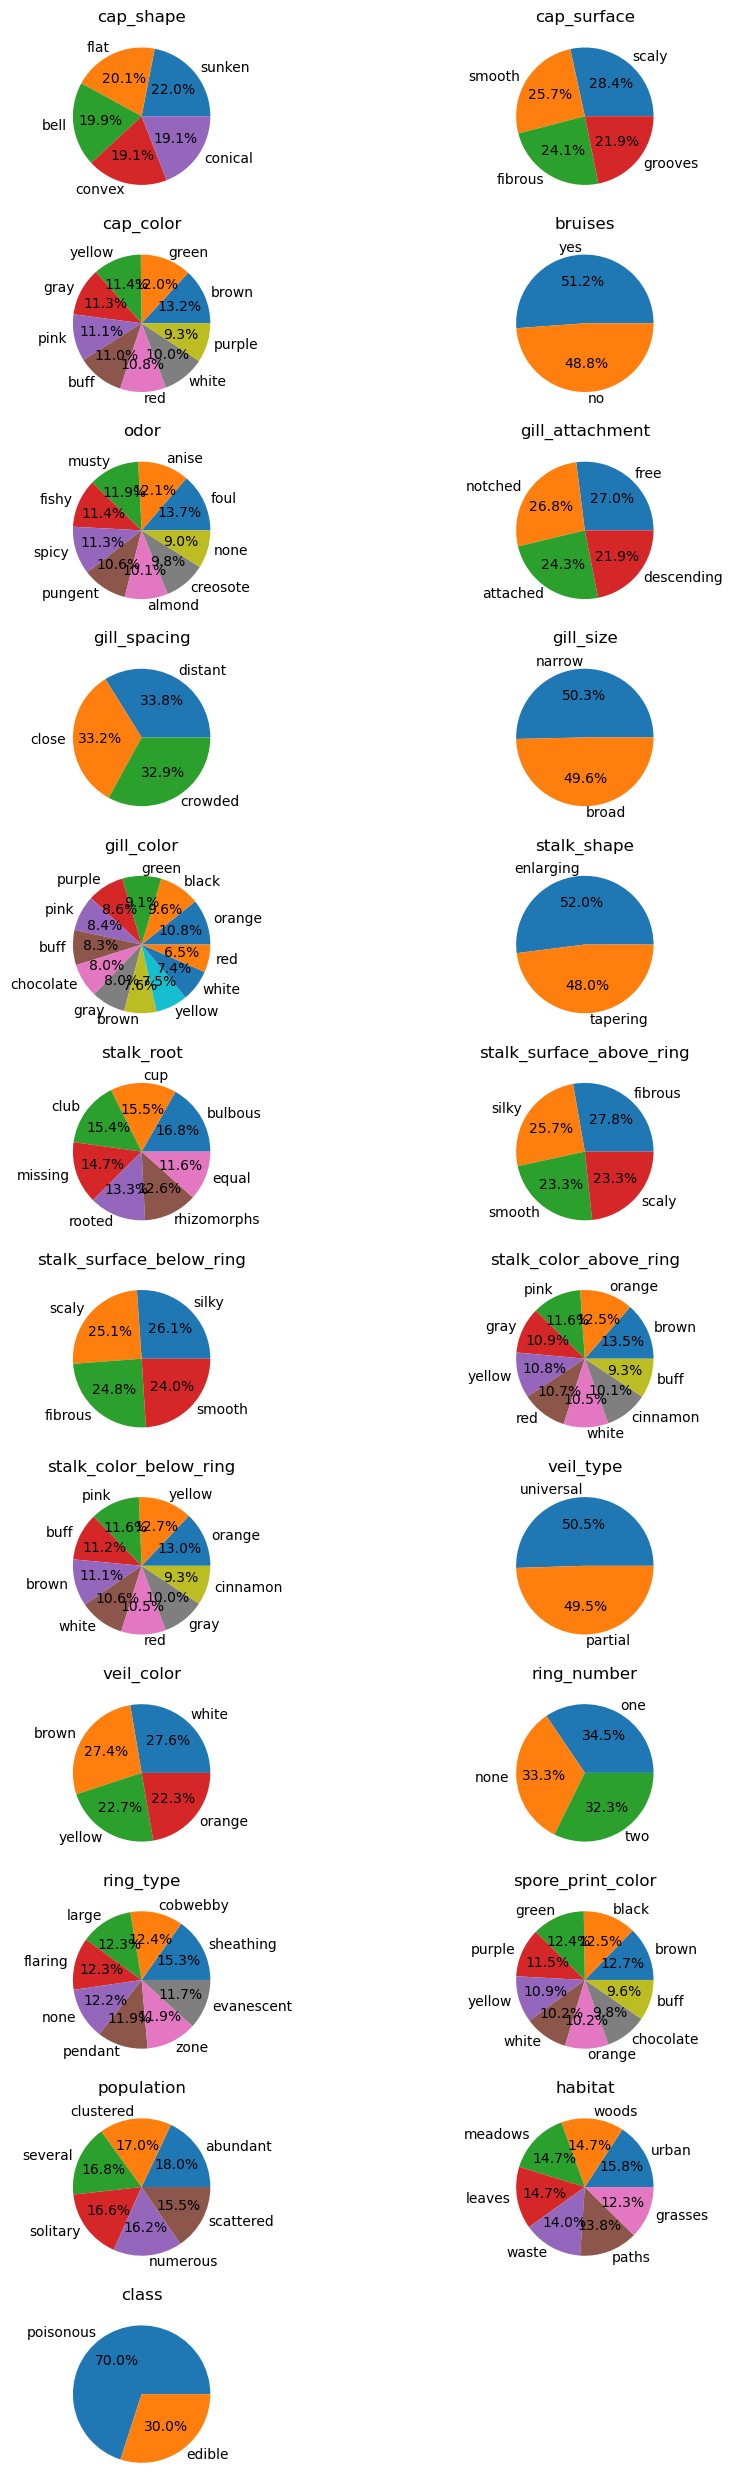

In [12]:
#class distributions 
#pie chart
def pie(data):
    n_num=data.select_dtypes(include='object').columns
    l_num=len(n_num)
    n_rows=(l_num+1)//2
    sub_index=1
    plt.figure(figsize=(10,25))
    for col in data:
        dtype=data[col].dtypes
        if(dtype == 'object'):
            plt.subplot(n_rows,2,sub_index)
            plt.pie(data[col].value_counts(), labels=df[col].value_counts().index, autopct='%1.1f%%')
            plt.title(f'{col}')
            sub_index+=1
        else: 
            print(f"The '{col}' column contains the int or foalt data type.")        
    plt.tight_layout()
    plt.show()
pie(df)

In [13]:
#model fitting
Y=final_data['class']
X=final_data.drop(['class'],axis=1)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)
model=SVC()
model.fit(X_train,Y_train)
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)
train_acc=accuracy_score(Y_train,y_pred_train)
test_acc=accuracy_score(Y_test,y_pred_test)
print('Training accuracy :',np.round(train_acc,2))
print('Test accuracy :',np.round(test_acc,2))

Training accuracy : 0.72
Test accuracy : 0.71


Now lets just make results clearly by using cross validation at the same time we are going to use the hyperparameters too 

In [17]:
def cross_validation(X,Y,kernel_name,parameter_name,parameter_value):
    training_acc=[]
    _test_acc=[]
    precision=[]
    f1score=[]
    recall=[]
    
    for i in range(1,101):
        X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=i)
        #Dynamically we are going to set the parameter
        model_params={'kernel':kernel_name,parameter_name:parameter_value}
        _model=SVC(**model_params)
        _model.fit(X_train,Y_train)
        _Y_pred_train=model.predict(X_train)
        _Y_pred_test=model.predict(X_test)
        training_acc.append(accuracy_score(Y_train,_Y_pred_train))
        _test_acc.append(accuracy_score(Y_test,_Y_pred_test))
        precision.append(precision_score(Y_test,_Y_pred_test))
        f1score.append(f1_score(Y_test,_Y_pred_test))
        recall.append(recall_score(Y_test,_Y_pred_test))            
    summary={
        'kernel':kernel_name,
        'Training accuracy score':np.round(np.mean(training_acc)),
        'Test accuracy score':np.round(np.mean(_test_acc)),
        'Precision score of test_data ':np.round(np.mean(precision)),
        'recall_score of test_data':np.round(np.mean(recall)),
        'f1_score of test_data':np.round(np.mean(f1score))
        }
    print(summary)
cross_validation(X,Y,'poly','degree',1)
cross_validation(X,Y,'linear','C',1.0)
cross_validation(X,Y,'rbf','gamma',0.02)

{'kernel': 'poly', 'Training accuracy score': 1.0, 'Test accuracy score': 1.0, 'Precision score of test_data ': 1.0, 'recall_score of test_data': 1.0, 'f1_score of test_data': 1.0}
{'kernel': 'linear', 'Training accuracy score': 1.0, 'Test accuracy score': 1.0, 'Precision score of test_data ': 1.0, 'recall_score of test_data': 1.0, 'f1_score of test_data': 1.0}
{'kernel': 'rbf', 'Training accuracy score': 1.0, 'Test accuracy score': 1.0, 'Precision score of test_data ': 1.0, 'recall_score of test_data': 1.0, 'f1_score of test_data': 1.0}


In [15]:
'''
SVM Kernel Comparison:
    Linear Kernel: Fast and effective for linearly separable data.
    Polynomial Kernel: Captures more complex relationships; useful for non-linear patterns.
    RBF Kernel: Most flexible; good for complex, non-linear decision boundaries.
SVM Strengths and Weaknesses:
    Strengths: Effective in high-dimensional spaces, flexible with different kernels, robust against overfitting.
    Weaknesses: Sensitive to parameter selection and feature scaling, less interpretable, can be computationally expensive for large datasets.
    Practical Implications:SVM is versatile across domains (e.g., text, images, bioinformatics).
    Suitable for small to medium-sized datasets with high-dimensional data.

Not ideal for very large datasets due to scalability and computational constraints.
'''

'\nSVM Kernel Comparison:\n    Linear Kernel: Fast and effective for linearly separable data.\n    Polynomial Kernel: Captures more complex relationships; useful for non-linear patterns.\n    RBF Kernel: Most flexible; good for complex, non-linear decision boundaries.\nSVM Strengths and Weaknesses:\n    Strengths: Effective in high-dimensional spaces, flexible with different kernels, robust against overfitting.\n    Weaknesses: Sensitive to parameter selection and feature scaling, less interpretable, can be computationally expensive for large datasets.\n    Practical Implications:SVM is versatile across domains (e.g., text, images, bioinformatics).\n    Suitable for small to medium-sized datasets with high-dimensional data.\n\nNot ideal for very large datasets due to scalability and computational constraints.\n'